![Callysto.ca Banner](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-top.jpg?raw=true)

<a href="https://hub.callysto.ca/jupyter/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fcallysto%2Fcurriculum-notebooks&branch=master&subPath=Mathematics/InterpretingStatisticalData/interpreting-statistical-data.ipynb&depth=1" target="_parent"><img src="https://raw.githubusercontent.com/callysto/curriculum-notebooks/master/open-in-callysto-button.svg?sanitize=true" width="123" height="24" alt="Open in Callysto"/></a>

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() { if (code_show){ $('div.input').hide(); } else { $('div.input').show(); } code_show = !code_show } 
$( document ).ready(code_toggle);
</script>

Raw code hidden. To show code, click <a href="javascript:code_toggle()">here</a>. <b>To begin the notebook, click Kernel then click Restart & Run All. </b> ''')

In [2]:
import random
import math
import scipy as sp
import scipy.stats as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from numpy import linspace
from scipy.stats import truncnorm
from ipywidgets import widgets, interact, Layout, Button, Box, interact_manual, fixed
from IPython.display import display, Markdown, Javascript

In [3]:
# Function: obtains z-value to use given confidence level
# Input: confidence level (enter value from 0 to 1.00)
# Output: positive z-value

def get_z_value(confidence_level):
    
    z_value_to_obtain = 1 - ((1-confidence_level)/2)
    
    z_value = st.norm.ppf(z_value_to_obtain)
    
    return round( z_value , 4 )

# Function: calculate confidence inteval using 95% confidence level
# Input: data set (as a list), confidence level, and a string for output 'confidence interval','mean','std','error'
# Output: confidence interval
# Example: calculate_confidence_interval([12,19,32,1,9,10,23,23,12,19],'confidence interval')

def calculate_confidence_interval(data_set,get_output,confidence_level):
    
    # Associated z-value with 95% confidence level
    
    z = get_z_value(confidence_level)
    
    # Convert data set
    
    data_set = np.array(data_set)
    
    # Data set parameters
    
    n = data_set.size
    x = np.mean(data_set)
    s = np.std(data_set)
    moe = z*(s/n**(1/2))
    
    # Output
    
    confidence_interval = ( x-z*(s/n**(1/2)) , x+z*(s/n**(1/2)) )
    
    if(get_output == 'confidence interval'):
        
        return confidence_interval
    
    if(get_output == 'mean'):
        
        return x
    
    if(get_output == 'std'):
        
        return s
    
    if(get_output == 'margin of error'):
        
        return moe

# Function: modified truncated normal
# Input: mean, standard deviation, lower bound, upper bound 
# Output: truncated normal value
# Example: get_truncated_normal(mean=8,sd=2,low=1,upp=10)

def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    
    return truncnorm( (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
 
# Function: generate data points that are noramlly distributed 
# Input: mean, standard deviation, lower bound, upper bound, number of data points
# Output: list of data points where the data follow a normal distribution
# Example: generate_data_points(175,15,150,200,100)

def generate_data_values(mean,st_dev,lower_bd,uper_bd,data_pts):
    
    x = get_truncated_normal(mean=mean,sd=st_dev,low=lower_bd,upp=uper_bd)
    
    return x.rvs(data_pts)

# Function: create a list of intervals 
# Input: start value, size of interval, number of intervals 
# Output: list of intervals with fixed sizes
# Example: create_intervals(150,2.5,20)

def create_intervals(start,interval_size,number_of_intervals):
    
    list_of_intervals = []
    
    for i in range(number_of_intervals):
        
        current_interval = [ start + i*interval_size , start + (i+1)*interval_size ]
        
        list_of_intervals.append(current_interval)
    
    return list_of_intervals

# Function: create a dictionary with interval as keys
# Input: list of intervals
# Output: dictionary, with keys as intervals, values intiated at 0
# Example: interval_dictionary( [ [1,2] , [3,4] ])

def interval_dict(interval_list):
    
    interval_item_count = {}

    for interval in interval_list:
    
        interval_key = "[" + str(interval[0]) + "," + str(interval[1]) + "]"

        interval_item_count[interval_key] = 0
        
    return interval_item_count

# Function: counts the number of values that belong in a certain interval
# Input: values of data, list of intervals, dictionary with intervals as key
# Ouput: dictionary with interval as key and value as the number of times a value in the data set lives in that interval

def interval_value_count(data_values,interval_list,interval_dict):

    for value in data_values:
        
        for interval in interval_list:

            lower_bd = interval[0]
            upper_bd = interval[1]

            interval_key = "[" + str(lower_bd) + "," + str(upper_bd) + "]"
            
            if(lower_bd <= value and value < upper_bd):
                
                interval_dict[interval_key] += 1
                
    return interval_dict

# Function: plots confidence intervals, showing where the real mean lies and showing intervals that "miss" the mean
# Input: data set, lower bound and upper bound of data set, sample set, iteration (number of intervals to generate)
# Output: confidence interval plots

def ci_plot(data, lower_bound, upper_bound, sample, iterations, print_statement,confidence_level):

    fig = plt.figure(figsize=(20, 0.75*iterations))
    ax = fig.add_subplot(111)
    
    # Obtain data set statistics

    data = np.array(data)
    data_mean = data.mean()
    
    # We could use the data set's minimum and maximum to set as x_min and x_max, but we've set it to be 150,200
    # in this case, just to make the plot visually appealing. 
    # (i.e. the dataset is randomly generated from 150-200, however, we might have 151.3,198.7 as min,max.
    
    xmin = lower_bound
    xmax = upper_bound
    
    # Plot confidence intervals

    y = 2*iterations
    counter = 0
    
    for i in range(iterations):

        sample_set = random.sample(data.tolist(), sample)
        confidence_interval = calculate_confidence_interval(sample_set, 'confidence interval',confidence_level)    
        plt.hlines(0.75*i , xmin, confidence_interval[0])
        plt.hlines(0.75*i, confidence_interval[1], xmax)

        if (data_mean < confidence_interval[0] or data_mean > confidence_interval[1]):

            plt.hlines(0.75*i, confidence_interval[0], confidence_interval[1], color = 'r', linewidth = 4)
            plt.text(confidence_interval[0], 0.75*i -0.1, '(', horizontalalignment='center',  fontsize = 25, color = 'r', weight = 'bold')
            plt.text(confidence_interval[1],  0.75*i -0.1, ')', horizontalalignment='center', fontsize = 25, color = 'r', weight = 'bold')  
            counter += 1
        else:

            plt.hlines(0.75*i, confidence_interval[0], confidence_interval[1], color = 'g', linewidth = 4)
            plt.text(confidence_interval[0], 0.75*i -0.1, '(', horizontalalignment='center',  fontsize = 25, color = 'g', weight = 'bold')
            plt.text(confidence_interval[1],  0.75*i -0.1, ')', horizontalalignment='center', fontsize = 25, color = 'g', weight = 'bold')

        ci_min = str("{0:.2f}".format(confidence_interval[0]))
        ci_max = str("{0:.2f}".format(confidence_interval[1]))

        plt.text(confidence_interval[0], 0.75*i -0.4, ci_min, horizontalalignment='right',  fontsize = 12)
        plt.text(confidence_interval[1],  0.75*i -0.4, ci_max, horizontalalignment='left', fontsize = 12)

        plt.text(lower_bound - 3, 0.75*i, lower_bound, verticalalignment = 'center', fontsize = 15)
        plt.text(upper_bound + 2, 0.75*i, upper_bound, verticalalignment = 'center', fontsize = 15)
    
    if (print_statement == True):
        
        percentage_containing_true = float("{0:.2f}".format((iterations-counter)/iterations))*100
        percentage_not_containing_true = (100 - percentage_containing_true)
        
        display(Markdown("<center>" + str(round(percentage_containing_true,2)) +"% of the confidence intervals contain the true mean value. That is, " 
                         + str(round(percentage_not_containing_true,2)) + "% do not. <center>"))
            
    plt.text(data_mean, 0.75*iterations+0.25 , str("{0:.2f}".format(data_mean)), horizontalalignment = 'center', fontsize = 15, color = 'b')
    plt.vlines(data_mean, -0.25, iterations, linestyle = '--', color = 'b', linewidth = 3)
    ax.set_xlim(lower_bound-5,upper_bound+10)
    ax.set_ylim(-.25,0.75*iterations)
    plt.axis('off')
    plt.show()
    
# Function: executes the cell below on click event using a Jupyter button widget
    
def run_cells(ev):
    
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1,IPython.notebook.get_selected_index()+2)'))
    
# Function: executes the cell above on click event using Jupyter button widget
# Note: I tried parametrizing this function by allowing for which range of cells to run, but the JS command
#       does not work for some reason.
    
def run_cell_above(ev):
    
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()-1,IPython.notebook.get_selected_index())'))

# Function: executes the cell previous on click event using a Jupyter button widget

def run_prev(ev):
    
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()-2,IPython.notebook.get_selected_index()+0)'))
    
def run_above_current(ev):
    
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()-2,IPython.notebook.get_selected_index()+1)'))    
    
# Function: checks if input is float
# Input: string 
# Output: boolean

def isfloat(val):
    
    try: 
        
        float(val)
        
        return True
    
    except ValueError:
        
        return False
    
# Function: check if input is positive float
# Input: string
# Output: 1 or 0
    
def is_positive_float(val):

    if(isfloat(val) == True and float(val) >= 0):

        return 1

    else:

        return 0

In [4]:
# Parameters for data generation

data_points = 25000
mean = 175
standard_error = 15
lower_bound = 150
upper_bound = 200

# Functions to call to set up dictionary containing height intervals and population count
        
data_values = generate_data_values(mean,standard_error,lower_bound,upper_bound,data_points)
interval_list = create_intervals(150,2.5,20)
interval_dictionary = interval_dict(interval_list)
data_dict = interval_value_count(data_values,interval_list,interval_dictionary)

# Note: 
# This interval is added with 0 value to get the last ticker value of 200 to show up in the bar plot later
# It's for improving the presentation of the bar plot

data_dict['200.0,202.25'] = 0

# Interpreting Statistical Data

## Introduction

Statistical reasoning plays an increasingly large role in everyday's life, from politics (opinion polls) to sports (statistics about sports teams), through many news about health or economy for example. The goal of this notebook is to introduce and illustrate two important notions about interpreting statistical data, the notions of confidence interval and confidence level.

This notebook is split into two parts. The first part is a short lecture about the statistical concepts we want to work with. The second one  provides some interactive tools to experiment with them and illustrates the use of these concepts in some real-world applications.

## Part 1. Statistical Concepts

### 1.A. Mean and Standard Deviation

We first introduce well known concepts, mean and standard deviation.

<div class="alert alert-warning">
<font color="black"><b>Definition: mean.</b> Given a data set of $N$ numbers $\{x_1,x_2,\dots,x_N\}$, we denote the **mean** of the data set $\overline{x}$ (pronounced "x bar") to be
$$ $$
$$\overline{x} = \frac{x_1+x_2+\cdots+x_N}{N}.$$</font>
</div>

**Example. ** Suppose we have the following set of data: $\{13, 19, 7, 3\}$. Here, we have $4$ numbers, so $N=4$. The mean of this data set is given by:

$$\begin{align} 
\overline{x} &= \frac{x_1+x_2+x_3+x_4}{4} \\
&= \frac{13+19+7+3}{4} \\
&= 10.5 
\end{align}$$

In [5]:
# Generate random mean for question

expected_answer = round( random.random()*100 , 1)

# Display exercise prompt

display(Markdown("**Exercise. ** Produce a data set with five different positive distinct values with a mean of " + "$" + str(expected_answer) + "$"))
display(Markdown("In the input box below, separate each of your values with a comma."))
display(Markdown("For example: `52.7, 39.2, 11.3, 42.1 , 56.5`"))

**Exercise. ** Produce a data set with five different positive distinct values with a mean of $77.6$

In the input box below, separate each of your values with a comma.

For example: `52.7, 39.2, 11.3, 42.1 , 56.5`

In [6]:
# Set up text and button widget parameters

mean_exercise_text = widgets.Text( placeholder='Enter your numbers here.', description='', disabled=False , layout=Layout(width='40%') )
mean_exercise_button = widgets.Button( button_style='info',description="Enter", layout=Layout(width='20%', height='30px') )
generate_new_mean = widgets.Button( button_style='info',description="Generate New Exercise", layout=Layout(width='20%', height='30px') )

# Display widgets

display(mean_exercise_text)
display(mean_exercise_button)
display(generate_new_mean)

# On button click, execute the next cell

mean_exercise_button.on_click( run_cells )
generate_new_mean.on_click( run_prev )

Text(value='', layout=Layout(width='40%'), placeholder='Enter your numbers here.')

Button(button_style='info', description='Enter', layout=Layout(height='30px', width='20%'), style=ButtonStyle(…

Button(button_style='info', description='Generate New Exercise', layout=Layout(height='30px', width='20%'), st…

In [7]:
# Obtain user input

user_input = mean_exercise_text.value
user_entries = user_input.split(",")

# Check user input validity

input_valid = 1
user_input_total = 0 
user_input_set = set()

# Check for number of entries

if(len(user_entries) > 5):
    
    display(Markdown("Too much entries. Please enter five distinct decimal values."))
    input_valid = 0

if(user_input != ""):
    
    # Check entries are of positive decimal values only

    for entry in user_entries:

        if(is_positive_float(entry) == False):

            display(Markdown("`" + entry + "`" + " is not a valid input. Please enter positive decimal values only."))
            input_valid = 0

        else: 

            user_input_total += float(entry)
            user_input_set.add(float(entry))

    # Check if five distinct positive decimal entries

    if(input_valid == 1 and len(user_input_set) < 5):

        display(Markdown("Please enter five distinct positive decimal values only."))
        input_valid = 0
    
    # Prepare string output format

    string_out = ""

    for entry in user_input_set:

        string_out += "$" + str(entry) + "$" + ", "

    string_out = string_out[0:len(string_out) - 2]

    # Check user mean

    user_mean = round( user_input_total/5 , 2 )
    user_mean_str = "$" + str(user_mean) + "$"

    if(input_valid == 1 and user_mean == expected_answer):

        display(Markdown("Your data set " + string_out + " has a mean value of " + user_mean_str + " which is the expected mean value!"))
        mean_exercise_button.close()
        mean_exercise_text.close()
        
    elif(input_valid == 1 and user_mean != expected_answer):

        display(Markdown("Your data set " + string_out + " has a mean value of " + user_mean_str + ". The expected mean value is " + "$" + str(expected_answer) + "$" + " Please try again."))

$$\cdots$$
<div class="alert alert-warning">
<font color="black"><b>Definition: standard deviation.</b> Given a data set of $N$ numbers $\{x_1,x_2,\dots,x_N\}$, we define the **standard deviation** of the data set, that we denote by $s$ as follows:
$$\displaystyle s = \sqrt{ \frac{1}{N}\left( (x_1-\overline{x})^2 + (x_2-\overline{x})^2 + \cdots + (x_N-\overline{x})^2 \right) }.$$</font>
</div>

**Example. ** Suppose again that we have the following set of data: $\{13, 19, 7, 3\}$. In the previous example, we've calculated $N=4$ and $\overline{x} = 10.5$. The standard deviation of this data set is given to be:

$$\begin{align} s &= \sqrt{ \frac{1}{4}\left( (x_1-\overline{x})^2 + (x_2-\overline{x})^2 + (x_3-\overline{x})^2 + + (x_4-\overline{x})^2 \right) }  \\
&= \sqrt{ \frac{1}{4}\left( (13 - 10.5)^2 + (19-10.5)^2 + (7-10.5)^2 + (3-10.5)^2 \right) } \\
&= \sqrt{ \frac{1}{4}\left( 6.25 + 72.5 + 12.25 + 56.25 \right) } \\
&= \sqrt{ \frac{147.25}{4} } \\
&\approx 6.06733\dots \\
\end{align}$$

**Significance. ** 
The standard deviation complements the mean by telling us how much we can expect that an element of our data set deviates from the mean. The mean alone does not differentiate between the case where all elements of our data set have the same value (for example $\{2,2,2,2\}$ with mean $2$ and standard deviation $0$) or have value alternating around the mean ($\{1,3,1,3\}$ has also mean $2$ but standard deviation $1$).

The standard deviation of a data set is a measure that quantifies the amount of variation in the data set. What a low standard deviation says is that the data points tend to be closer to the mean of the data set, whereas a high standard deviation says that the data points are more spread apart and take over a wider range of values that are further from the mean.

**Exercise: ** Produce a data set of four values with a mean value of $5$ and standard deviation of $2.24$.

**Hint: ** Use integer values only. 

In the input box below, separate each of your values with a comma.

Example: `1, 7, 8, 9`

In [8]:
# Set up text and button widget parameters

std_exercise_text = widgets.Text( placeholder='Enter your numbers here.', description='', disabled=False , layout=Layout(width='40%') )
std_exercise_button = widgets.Button( button_style='info',description="Enter", layout=Layout(width='20%', height='30px') )

# Display widgets

display(std_exercise_text)
display(std_exercise_button)

# On button click, execute the next cell

std_exercise_button.on_click( run_cells )

# Vector holding mean, std values

mean_vector = []
std_vector = []
dataset_vector = []

Text(value='', layout=Layout(width='40%'), placeholder='Enter your numbers here.')

Button(button_style='info', description='Enter', layout=Layout(height='30px', width='20%'), style=ButtonStyle(…

In [9]:
# Expected input

expected_mean = 5
expected_std = 2.24

# Obtain user input

user_input = std_exercise_text.value
user_entries = user_input.split(",")

# Check user input validity

input_valid = 1
user_input_total = 0 
user_input_set = set()

# Check for number of entries

if(len(user_entries) > 4):
    
    display(Markdown("Too much entries. Please enter four decimal values only."))
    input_valid = 0
    
if(user_input != ""):
    
    # Check entries are of positive decimal values only

    for entry in user_entries:

        if(is_positive_float(entry) == False):

            display(Markdown("`" + entry + "`" + " is not a valid input. Please enter positive decimal values only."))
            input_valid = 0

        else:

            user_input_total += float(entry)
            user_input_set.add(float(entry))
            
    # Check if five distinct positive decimal entries

    if(input_valid == 1 and len(user_input_set) < 4):

        display(Markdown("Please enter four distinct positive decimal values only."))
        input_valid = 0
        
    if(input_valid == 1):

        # Calculate user mean

        user_mean = 0

        for entry in user_entries:

            user_mean += float(entry)

        user_mean = round( user_mean/len(user_entries) , 2 )

        # Calculate user STD

        total_sum = 0 

        for entry in user_entries:

            entry = float(entry)

            total_sum += (entry-user_mean)**2

        user_std = round( (total_sum/len(user_entries))**(1/2) , 2 )
        
        # Correct input 
        
        if(input_valid == 1 and user_mean == expected_mean and user_std == expected_std):
            
            display(Markdown("Your dataset has the expected mean of $5$ and standard deviation of $2.58!$"))
            
            # Close tabs
            
            std_exercise_button.close()
            std_exercise_text.close()
            
        # Display values
        
        elif(input_valid == 1 and user_mean != expected_mean and user_std != expected_std):
            
            wrong_mean_message = "Your data set has a mean of " + "$" + str(user_mean) + "$" + " which does not equal the expected mean of $5$."
            
            display(Markdown(wrong_mean_message))
            display(Markdown("Your data set gives the following values: "))
            display(Markdown("Mean: " + "$" + str(user_mean) + "$"))
            display(Markdown("Standard Deviation: " + "$" + str(round(user_std,2)) + "$"))
            
        elif(input_valid == 1 and user_mean == expected_mean and user_std != expected_std):

            display(Markdown("Your data set gives the following values: "))
            display(Markdown("Mean: " + "$" + str(user_mean) + "$"))
            display(Markdown("Standard Deviation: " + "$" + str(round(user_std,2)) + "$"))
            
            mean_vector.append(user_mean)
            std_vector.append(user_std)
            dataset_vector.append(user_entries)
            
            # Check for std the user came up with that is closest to the expected answer

            diff_vector = []

            for entry in std_vector:

                diff = abs(entry-expected_std)
                diff_vector.append( round(diff,2) )

            # Obtain index of minimum difference in the list 

            index_of_best = np.argmin(diff_vector)
            
            # Check if user's current answer is better than their best answer so far
            
            display(Markdown("**Best input so far: **"))
            
            current_diff = abs(user_std - expected_std)
            
            best_dataset = ""
            
            for entry in dataset_vector[index_of_best]:
                
                best_dataset += entry + ","
            
            best_dataset_msg = "Data set with values: " + "$" + str(best_dataset[:-1]) + "$" + " has standard value of " + "$" + str(std_vector[index_of_best]) + "$" + " which is closest to the expected standard value of $2.24.$"

            display(Markdown(best_dataset_msg))

### 1.B. Sampling Data

We consider now the following context, inspired by real-world application of statistics. We want to obtain the average (mean) value of a statistic over a very large number of cases. For example, we could be interested in the average height of people in Canada. In order to obtain the *exact answer*, we would need to measure the height of all people living in Canada. This is obviously impossible. So we need to proceed in a different way: we will select a **random sample** of the Canadian population and obtain the height measurements of the people in that sample. And the question that naturally occurs is: how can we deduce anything about the average height of the whole population from this sample? Surprisingly, we will see that we can say something, using the notions of **confidence level**, **confidence interval** and **margin of error**, concepts you might have heard about especially in opinion polls. This is based on non-trivial statistics, and we will not explore the technical aspects, but illustrate these notions with concrete examples.

#### Confidence interval and confidence level
So there exists a quantity $x$ we want to estimate because we can not obtain it exactly (the average height of people living in Canada in our example). We have measured the height of a random sample of $N$ people, let's denote it by  $\{x_1,x_2,\dots,x_N\}$.

The first important point related to sampling data is to estimate the mean of a quantity, that is, we will not compute a single number to approximate $x$, but an **interval** $(x_\text{low},x_\text{high})$. So we decide to lose *precision*, as an interval is less precise than a single number. The key point is that we want to be **confident**  that the value $x$ is in that interval. This notion of confidence is important and we want to quantify it in some way. We would like to be able to say something like "I am $95\%$ confident that the value $x$ is in the interval $(x_\text{low},x_\text{high})$ I computed". This is a sentence we read often with opinion polls, aimed at describing their **accuracy**.

Now, for us, we want to understand how to interpret the expression "$95\%$ confident". In our example about averaging the height of Canadian people, it can be understood as follows: if we were going to repeat *often* (ideally an infinite number of times ... obviously this is impossible) and *independently* (our samples are truly random) the process of
* selecting a random set of $N$ people
* measuring the height of the sampled people, $\{x_1,x_2,\dots,x_N\}$
* using the same method to deduce from $\{x_1,x_2,\dots,x_N\}$ the interval $(x_\text{low},x_\text{high})$

then $95\%$ of the intervals generated as above would contain the exact value $x$ we want to estimate.

So we have **no guarantee** about the precise interval $(x_\text{low},x_\text{high})$ we computed from a specific sample $\{x_1,x_2,\dots,x_N\}$ but we expect it contains $x$ with probability $95\%$.

#### Computing a confidence interval for a given confidence level

The question now is: if we want to have a given confidence level (so we chose it), what is the method to compute $(x_\text{low},x_\text{high})$ from $\{x_1,x_2,\dots,x_N\}$? Let's denote the confidence level by $\beta$, a real number between $0$ and $1$ ($\beta=0.95$ means a confidence level of $95\%$).

The method to compute $(x_\text{low},x_\text{high})$ is as follows:
* Step 1. We calculate the mean $\overline{x}$ of the sampled set $\{x_1,x_2,\dots,x_N\}$, and its standard deviation $s$.
* Step 2. We find the **z-score** $z$ corresponding to the chosen confidence level $\beta$ (we will not discuss in this notebook how these z-scores are obtained, but they can be read in a table, see http://www.statisticshowto.com/tables/z-table/ and we provide a separate notebook to compute it given $\beta$).
* Step 3. Calculate $\displaystyle x_\text{low}=\overline{x}- z\frac{s}{\sqrt{N}}$ and $\displaystyle x_\text{high}= \overline{x}+ z\frac{s}{\sqrt{N}}$. 
So our confidence interval is:
$$(x_\text{low},x_\text{high}) = \displaystyle \left(\overline{x}- z\frac{s}{\sqrt{N}} ,\overline{x}+ z\frac{s}{\sqrt{N}} \right).$$

##### Comments.
This formula is actually quite intuitive. We can see that this confidence interval is centred around the mean of the sampled data ($\overline{x}$), with some slack on both sides that depends on the standard deviation, the number of samples and the mysterious z-score. So intuitively, we assume that $\overline{x}$ is more or less our approximation of $x$; this makes sense. But if the standard deviation is large (i.e. we see lots of variation in the sampled measurements) then we widen the interval. Conversely, if we sample many data points (i.e. if $N$ is large) then we shrink the interval (because we divide by $\sqrt{N}$); again this make sense, as the more we sample the more we expect to get a good idea of the quantity we want to approximate. What is nice is that all these ideas combine into a quite simple formula, thanks to the z-score.

##### Example. 
Engineers are concerned with designing devices operated by workers to achieve high productivity and comfort. The article "Studies on Ergonomically Designed Alphanumeric Keyboards" (_Human Factors_, 185: 175-187) reports a study of preferred height for a keyboard. A sample of $N=31$ is given and a preferred keyboard height was reported by each of the $31$ sampled typists, with the sample average preferred being $\overline{x} = 80.0$ cm and the standard deviation being $s=2.0$ cm. Using the steps above, how may we obtain a 95% confidence interval for the real mean - the real preferred height for the population of experienced typists.

* Step 1. We know $N=31, \overline{x}=80$, and $s=2$.
* Step 2. Since we want a confidence level of 95%, we obtain an associated z-score of $1.96$. 
* Step 3. Calculating the estimates, we have: $\overline{x} \pm 1.96\cdot \frac{s}{\sqrt{n}} = 80 \pm (1.96)\frac{2.0}{\sqrt{31}} = 80.0 \pm 0.7 $. So $x_\text{low} = 79.3$ and $x_\text{high} = 80.7$. 

So our confidence interval is $(79.3,80.7)$ and the confidence level of this interval (the probability it contains the mean preferred height for the population of experienced typists) is 95%. we can observe that the interval is quite narrow, thanks to the small standard deviation and the large value of $N$.

#### Margin of error.
Last we introduce the notion of margin of error.

<div class="alert alert-warning">
<font color="black"><b>Definition: margin of error.</b> In a confidence interval, we define the value $z\frac{s}{\sqrt{n}}$ to be the **margin of error** of the confidence interval.</font>
</div>

So we can see that actually the margin of error is nothing else that the half-size of the interval, based on the standard deviation, the sample size and the z-score associated to the confidence level. 

This is exactly how you should understand the notion of margin of error that we see in many opinion polls: they have polled a sample of $N$ people, chosen a confidence level, computed the corresponding confidence interval and report the centre value $\overline{x}$ and the half-size of the interval as margin of error.

## Part 2: Interactive Activities and Real Examples.

## How Does the Sample Size, Confidence Level, and Margin of Error Affect Confidence Intervals?

When calculating confidence interval, margin of error, and determining what confidence level to use, the size of the random sample we use is important. 

In the example we develop now, we look at the height distribution of men, among a population size of 25,000 individuals. In an interactive tool below, we will be looking at the impact of the random sample size on the size of the confidence interval and the margin of error.

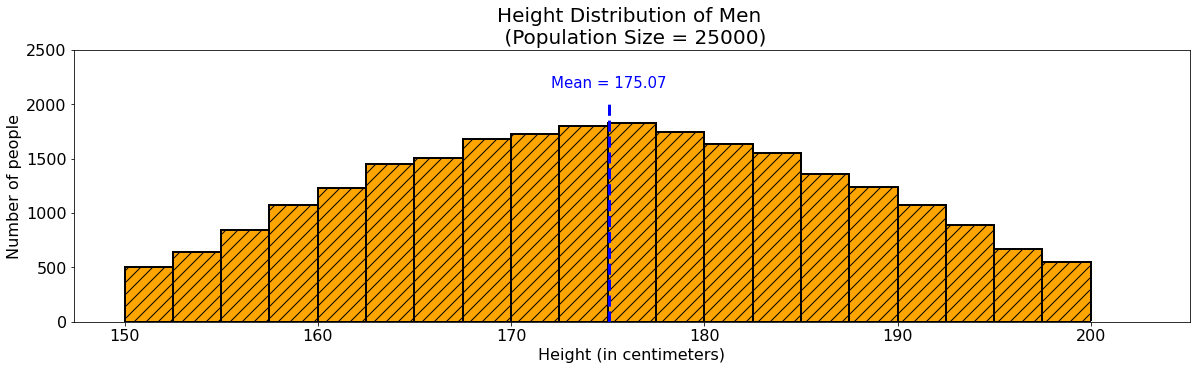

In [10]:
x_values = data_dict.keys()
y_values = list( data_dict.values() )

# Fix labeling for barchart

x_labels = linspace(150,200, len(y_values) ) 

# Bar plot

fig = plt.figure( figsize=(20,5) )
ax = fig.add_subplot(111)
bars = plt.bar( x_labels + (1.25) , y_values , 2.5 , hatch = '//' , alpha = 1 , edgecolor = 'black' , color = 'orange' , linewidth=2 )
mean_line = plt.vlines(data_values.mean(), 0, 2000, linestyle = '--', color = 'b', linewidth = 3)
mean_text = plt.text(data_values.mean(), 2150 , 'Mean = ' + str("{0:.2f}".format(data_values.mean())), horizontalalignment = 'center', fontsize = 15, color = 'b')
# Note:
# A dummy bar is intoduced at the right end of the bar plot, this is to have the maximum value of the plot
# on the x-axis show up for presentation purposes.

bars[-1].set_color('white')

# Plot display commands

ax.set_ylim(0,2500)
plt.title("Height Distribution of Men \n (Population Size = 25000)",fontsize = 20)
plt.xlabel('Height (in centimeters)',fontsize = 16)
plt.ylabel('Number of people',fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

In the bar chart above, each bar represents the number of men from the population that belongs in a certain height range. We have used intervals of size 2.5 to group our countings. For instance, the first bar counts the number of men with height 150-152.5, and we see that they are approximately 500 of the 25,000 population size. The next bar counts the number of men with height 152.5-150, with the count approximately at 600, and so on. The dashed line in blue shows the location of the mean in the bar plot.

Using a 95% confidence level means that if we record the heights of say 1,000 men from the population over and over again and calculate the confidence interval, we expect about 95% of the confidence intervals will obtain the true average height of men in the population.

Try it for yourself! 

The interactive tool below generates confidence intervals using 95% confidence levels for a sample size of your choice. The green intervals obtain the true mean whereas red intervals do not. With this tool you can appreciate visually how increasing the number of samples impacts positively the likelihood that the confidence intervals actually contain the mean height.

In [11]:
# Counter to prevent plotting intervals until run interact is clicked

counter_ci = 0

In [12]:
# Initialize widgets

style = {'description_width': 'initial'}

sample_size = widgets.IntSlider(value = 2500, min = 20, max = 5000, step = 20, description = 'Sample Size', style=style, readout_format='d')
iterations = widgets.IntSlider(value = 50,min = 5, max = 100, description = 'Number of Intervals', style=style, readout_format='d')
ci_button = widgets.Button(button_style='info', description="Run Interact", layout=Layout(width='15%', height='30px'))

# Display widgets 

display(sample_size)
display(iterations)
display(ci_button)

# Plot intervals on click

ci_button.on_click( run_cells )

IntSlider(value=2500, description='Sample Size', max=5000, min=20, step=20, style=SliderStyle(description_widt…

IntSlider(value=50, description='Number of Intervals', min=5, style=SliderStyle(description_width='initial'))

Button(button_style='info', description='Run Interact', layout=Layout(height='30px', width='15%'), style=Butto…

In [13]:
# Plot intervals once run interact is clicked 

counter_ci += 1

if counter_ci >= 2:
    ci_plot(data_values, lower_bound, upper_bound, sample_size.value , iterations.value, True, 0.95)

What happens to the size of the confidence intervals and margin of errors as sample sizes increase? Justify your answer.

In [14]:
# Text widget for this interactives question prompt

samplesize_interp_text = widgets.Textarea( value='', placeholder='', description='', disabled=False , layout=Layout(width='100%', height='100px') )

In [15]:
# Counter to question attempts

counter_samplesize_q = 0

In [16]:
# Other widgets for this interactive's question prompt 

box_layout = Layout(display='flex',
                    flex_flow='row',
                    align_items='stretch',
                    width='100%', justify_content = 'center')

save_button = widgets.Button(button_style='info',description="Save", layout=Layout(width='15%', height='30px'))
save_box = Box(children=[save_button], layout=box_layout)

display(samplesize_interp_text)
display(save_box)

save_button.on_click( run_cells )

Textarea(value='', layout=Layout(height='100px', width='100%'), placeholder='')

Box(children=(Button(button_style='info', description='Save', layout=Layout(height='30px', width='15%'), style…

In [17]:
def run_edit_cells( b ):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()-1,IPython.notebook.get_selected_index())'))
    edit_button.close()

samplesize_interp = samplesize_interp_text.value

edit_button = widgets.Button(button_style='info',description="Edit", layout=Layout(width='15%', height='30px'))

answer_button = widgets.Button(button_style='info',description="Reveal Answer", layout=Layout(width='15%', height='30px'))
options_box = Box(children=[edit_button, answer_button], layout=box_layout)

if ( samplesize_interp != ''):
    
    samplesize_interp_text.close()
    save_button.close()

    samplesize_interp_text = widgets.Textarea( value= samplesize_interp, placeholder='', description='', disabled=False , layout=Layout(width='100%', height='100px') )
    
    display(Markdown('<center>' + samplesize_interp + '</center>'))
    display(options_box)
    
edit_button.on_click( run_edit_cells )
answer_button.on_click(run_cells)

In [18]:
counter_samplesize_q += 1

if (counter_samplesize_q >= 2):
    display(Markdown("<b> Expected Answer: </b> "))
    display(Markdown("As sample size increases, confidence intervals and margin of errors decrease."))
    display(Markdown("<b> Explanation: </b> "))
    display(Markdown("By increasing sample size, we are increasing our data set and thus, we can acheive a more precise"
                    + " estimate of the true average height of men in the population. Note that the margin of error is half" 
                    + " of the size of the confidence interval. Hence, we see that if margin of error increases, then confidence increases and if margin of error decreases, then confidence intervals decreases.")) 

In the interactive tool below, we will fix our random sample size to be 1,000 individuals and compute 50 confidence intervals. So the only parameter we need to set is the confidence level, anbd we will see how it impacts the margin of error, i.e. the size of the intervals. Indeed the margin of error depends on the sample size (fixed to 1000 here) and the z-value, that gets lower as the confidence level decreases. 

Below, we can see that as we choose a higher value for the confidence level, the greater the z-value we need to use, which in turns makes the margin of error term larger, thus making the confidence interval larger. Intuitively, this is what we expect as a larger interval is more likely to contain the exact mean we want to estimate. With a low confidence level, the confidence intervals are very tight, and have a higher probability of not containing the true mean.

In [19]:
# Tried a step size of 0.1, but IntSlider widget does not have this feature

confidence_level_slider = widgets.IntSlider( value = 50, min = 1, max = 99, description = 'Confidence Level', style=style, readout_format='d')
confidence_level_button = widgets.Button(button_style='info', description="Run Interact", layout=Layout(width='15%', height='30px'))

display(confidence_level_slider)
display(confidence_level_button)

confidence_level_button.on_click( run_cells )

IntSlider(value=50, description='Confidence Level', max=99, min=1, style=SliderStyle(description_width='initia…

Button(button_style='info', description='Run Interact', layout=Layout(height='30px', width='15%'), style=Butto…

To obtain a confidence interval with $50\%$ confidence level requires a z-value of $0.6745.$

<center>50.0% of the confidence intervals contain the true mean value. That is, 50.0% do not. <center>

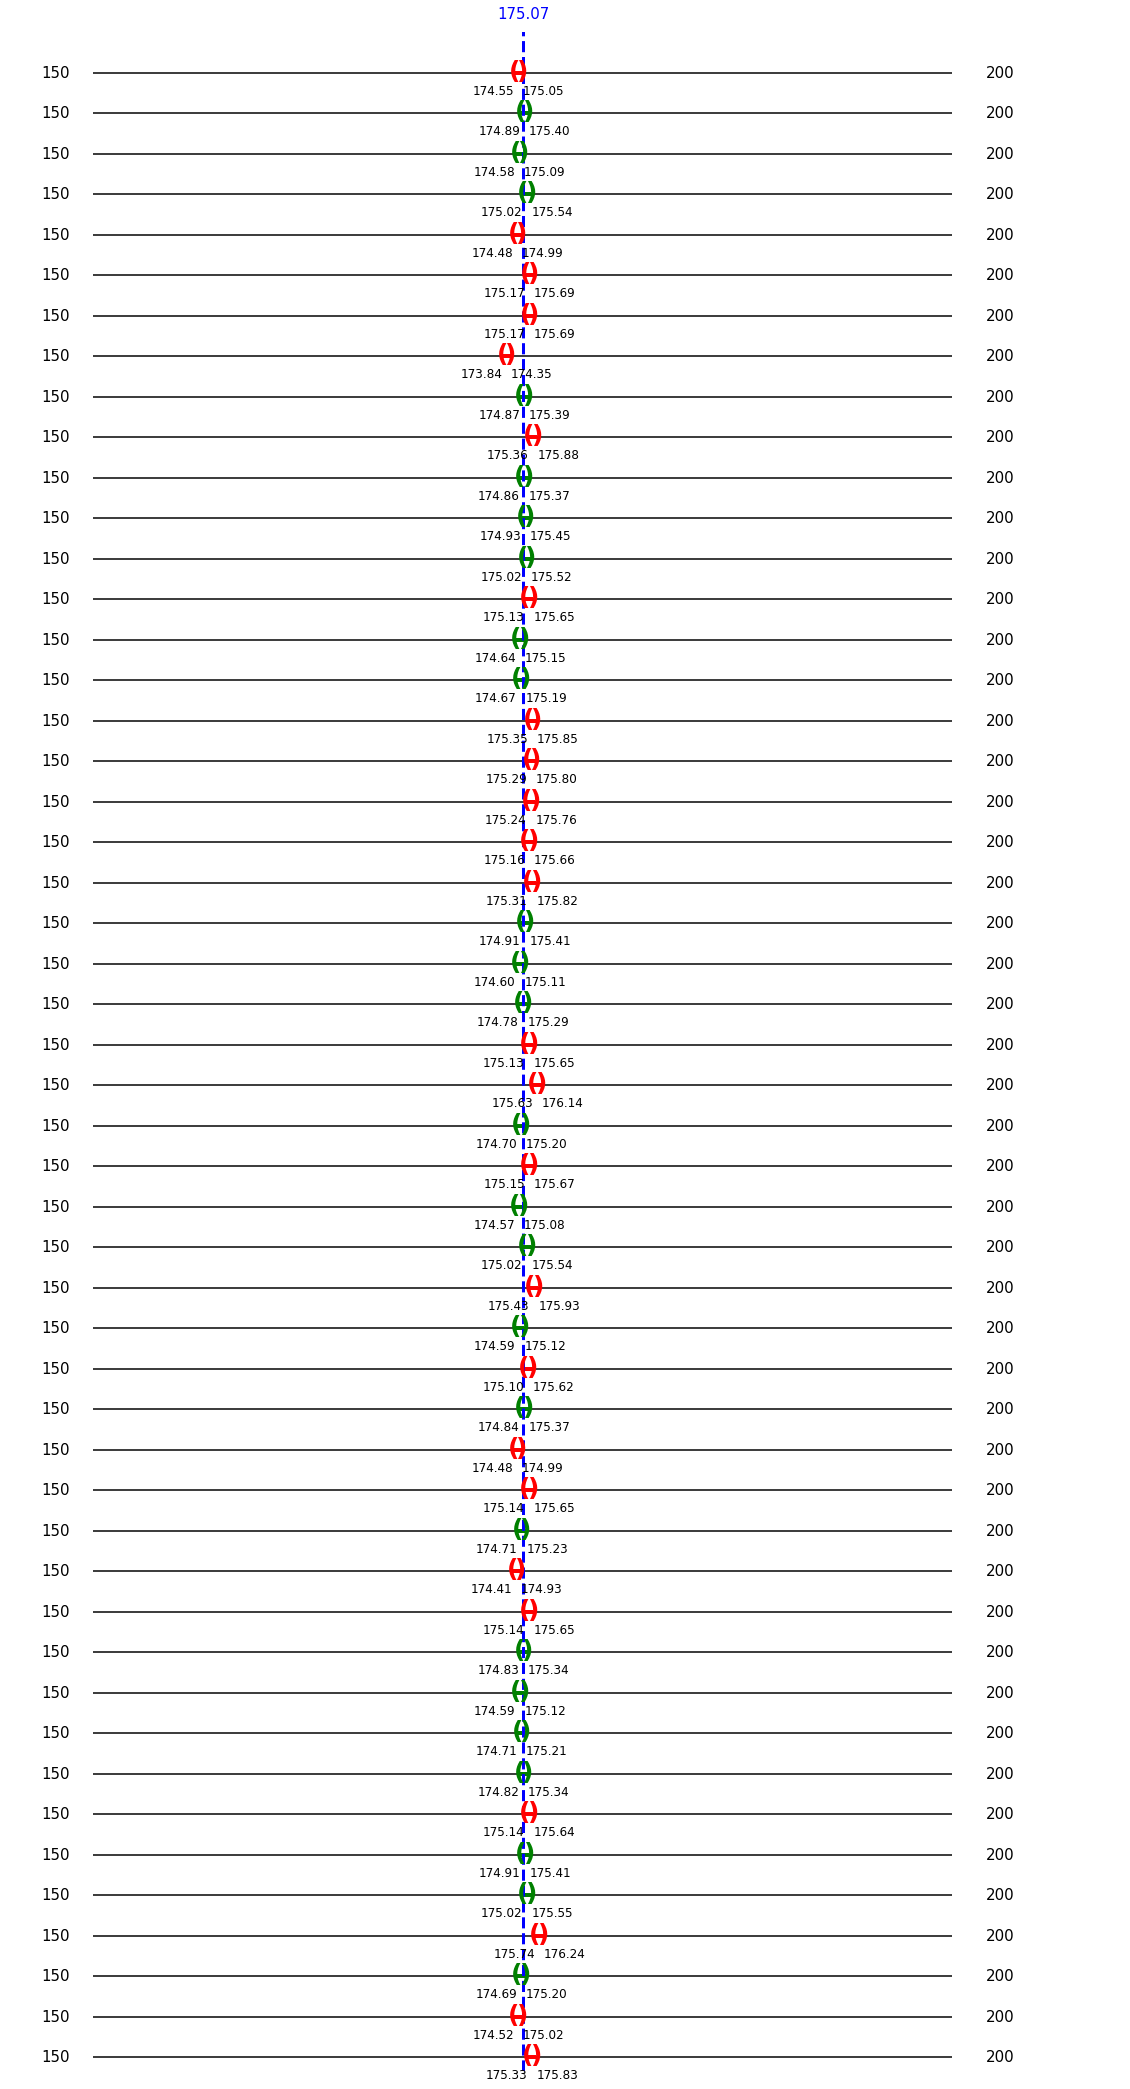

In [20]:
# Obtain confidence level and z-values

confidence_level = (confidence_level_slider.value)*(0.01)
z = get_z_value(confidence_level)

# Display

confidence_level_str = str( float(confidence_level)*100)[:-2] + "\%" 
message_out = "To obtain a confidence interval with $" + confidence_level_str + "$ confidence level requires a z-value of " + "$" + str(z) + ".$"

display(Markdown(message_out))

# Interval plots

sample_size_value = 1000
number_of_intervals = 50

ci_plot(data_values, lower_bound, upper_bound, sample_size_value , number_of_intervals, True, confidence_level)

## Confidence Intervals and Confidence Levels in Media

In 2017, [The Hockey News](https://thehockeynews.com/news/article/front-office-confidence-rankings-part-2-fans-weigh-in-on-how-each-team-is-doing) created a survey asking people to mark each NHL team's front office on a scale of 5 in six different categories: roster building, cap management, draft and develop, trading, free agency, and their overall vision. Over 1300 people contributed in the survey and since not everyone was familiar with every team's management group, each NHL team had roughly 800 to 1000 votes. 

The goal was to **rank** the NHL teams in each of the 6 categories. For a given category, this would have been easy if each team had received as many marks as there were people contributing to the survey: it would have been sufficient to rank according to the mean mark. But as noted above, not every participant marked every team, so The Hockey news faced an issue akin to sampling marks, where a participant not marking a team in a category was considered as this (missing) mark being un-sampled. So instead of a mean mark per category for each team, The Hockey News computed a 95% confidence interval. That is, for each of the 30 teams, they  obtained six confidence intervals (one for each ranking category), with 95% certainty that the intervals contains the actual mark value. Now, each of these confidence intervals have their associated margin of error (there are 180 intervals in total) which averaged out to be 0.06, which is quite small.

Take for example the Nashville Predators who ranked first overall out of the 30 teams.

<img src="./images/nashville-predators.jpg" alt="Drawing" style="height: 300px" style="width: 300px;"/>

Since the margin of error is about 0.06, the true mark (out of 5) of the team's ability in roster building likely (with probability 95%) lies in the confidence interval:

$$(4.4 - 0.06, 4.4 + 0.06) = (4.34, 4.46).$$

## Confidence Intervals and Margin of Error in Media

In [21]:
# Create nested column labels 

inner_columns = ['Men, Sample Size','Men, Mean','Men, Standard Deviation','Women, Sample Size','Women, Mean','Women, Standard Deviation']

# Row names

indices_labels = ['Systolic Blood Pressure','Diastolic Blood Pressure','Total Serum Cholesterol', 'Weight', 'Height', 'Body Mass Index']
dataframe = pd.DataFrame( [ [1623, 128.2, 17.5, 1911,126.5, 20.1] , [1622, 75.6, 9.8, 1910, 72.6, 9.7] , [1544, 192.4, 35.2, 1766, 207.1, 36.7], [1612, 194.0, 33.8, 1984, 157.7, 34.6], [1545, 68.9, 2.7, 1781, 63.4, 2.5], [1545, 28.8, 4.6, 1781, 27.6, 5.9] ] , columns = inner_columns)

# Group the labels as split by " , " 

labels = dataframe.columns.str.split(', ', expand=True).values
dataframe.columns = pd.MultiIndex.from_tuples([x for x in labels])
original_index_list = dataframe.index.tolist()

for current_index in range(len(original_index_list)):
    
    idx = original_index_list.index(current_index)
    original_index_list[current_index] = indices_labels[current_index]
    
d = dict(selector="th", props=[('text-align', 'left')])
dataframe.index = original_index_list

[Boston University of Public Health](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_Confidence_Intervals/BS704_Confidence_Intervals_print.html) analyzed data of 3,539 participants who attended the 7th Examination of the Offspring Cohort in The Framingham Heart Study. For people participating to the study, several health measures were taken, again with a missing data issue as not all participants submitted their information for each category, an issue similar to the hockey example above. The summarized data set is presented below.  

In [22]:
pd.options.display.max_rows = 120

display(dataframe.style.set_properties(**{'width':'12em', 'text-align':'center'})\
    .set_table_styles([d]))

With 95% confidence, the confidence interval of Men's Systolic Blood Pressure is $\left(127.35, 129.05\right)$ and the margin of error is $0.85$. That is, there is a 95% chance that the actual average of Men's Systolic Blood Pressure in the population belongs in this confidence interval.

In [23]:
def run_edit1_cells( b ):
   
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()-1,IPython.notebook.get_selected_index())'))
    edit_button_1.close()

def run_edit2_cells( b ):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()-1,IPython.notebook.get_selected_index())'))
    edit_button_2.close()


**Exercise 1.**  

In the next two exercises, we will be computing confidence intervals with a certain confidence level. In the following input box below, enter the confidence level desired to obtain the appropriate z-value to use.

In [24]:
# Set up text and button widget parameters

get_zv_text = widgets.Text( placeholder='Enter a value between 0 and 100.', description='', disabled=False , layout=Layout(width='25%') )
get_zv_button = widgets.Button(button_style='info',description="Enter", layout=Layout(width='10%', height='30px') )

# Display widgets

display(get_zv_text)
display(get_zv_button)

# On button click, execute the next cell

get_zv_button.on_click( run_cells )

Text(value='', layout=Layout(width='25%'), placeholder='Enter a value between 0 and 100.')

Button(button_style='info', description='Enter', layout=Layout(height='30px', width='10%'), style=ButtonStyle(…

In [25]:
# Obtain user input

confidence_level = get_zv_text.value

# Check range & display output if value is valid

invalid_input_msg = "Enter a value between 0 and 100."

if(isfloat(confidence_level) == 1):
    
    confidence_level = float(get_zv_text.value)*(0.01)
    
    if( (confidence_level > 0) and (confidence_level < 1) ):
        
        z_value = get_z_value(confidence_level)
        md_print = "The z-value you need to use for a " + "$" + str(get_zv_text.value) + "\%$" + " confidence interval is " + "$" + str(z_value) + ".$"
        display(Markdown( md_print) )
        
    else:
        
        display(Markdown(invalid_input_msg))
               
else:
    
    display(Markdown(invalid_input_msg))

Enter a value between 0 and 100.

**(i)** Calculate the confidence interval of Women's Weight with a $95\%$ confidence level. Round each value to the nearest hundredth.

In [26]:
# Widgets for interval question 

box_layout = Layout(display='flex',
                    flex_flow='row',
                    align_items='stretch',
                    width='100%', justify_content = 'center')

# Interval display format

comma_a = widgets.HTMLMath(value="$,$")
open_bracket_a = widgets.HTMLMath(value="$\Big($")
close_bracket_a = widgets.HTMLMath(value="$\Big)$")

# Text input for left and right interval

left_endpoint_text_a = widgets.Textarea( value='', placeholder='', description='', disabled=False , layout=Layout(width='10%', height='32.5px') )
right_endpoint_text_a = widgets.Textarea( value='', placeholder='', description='', disabled=False , layout=Layout(width='10%', height='32.5px') )

# Display widgets

confidence_interval = [open_bracket_a, left_endpoint_text_a, comma_a, right_endpoint_text_a, close_bracket_a]
ci_box = Box(children=confidence_interval, layout=box_layout)
display(ci_box)
submit_button_1 = widgets.Button(button_style='info',description="Submit", layout=Layout(width='15%', height='30px'))
submit_box = Box(children=[submit_button_1], layout=box_layout)
display(submit_box)

# Run next cell on submit click

submit_button_1.on_click( run_cells )

# Question attempt counter

counter_a = 0

Box(children=(HTMLMath(value='$\\Big($'), Textarea(value='', layout=Layout(height='32.5px', width='10%'), plac…

Box(children=(Button(button_style='info', description='Submit', layout=Layout(height='30px', width='15%'), sty…

In [27]:
# Obtain user's interval values

min_range_a = left_endpoint_text_a.value
max_range_a = right_endpoint_text_a.value

# Fix format

correct_min_range_a = "{0:.2f}".format(157.7-1.96*34.6/math.sqrt(1984))
correct_max_range_a = "{0:.2f}".format(157.7+1.96*34.6/math.sqrt(1984))

if ( min_range_a == correct_min_range_a and max_range_a == correct_max_range_a):
    
    # Close question prompt widgets
    
    open_bracket_a.close()
    close_bracket_a.close()
    comma_a.close()
    left_endpoint_text_a.close()
    right_endpoint_text_a.close()
    submit_button_1.close()

    confidence_interval_string = '(' + min_range_a + ',' + max_range_a + ')'
    
    # Display user answer
    
    display(Markdown("**You answered: **"))
    display(Markdown("<center>$"+confidence_interval_string+"$ </center>"))
    display(Markdown("This is correct!"))
    
    # Display expected answer + explanations
    
    display(Markdown("<b> Expected Answer: </b> "))
    display(Markdown("$(156.18, 159.22)$"))
    display(Markdown("<b> Explanation: </b> "))
    display(Markdown("For Women's weight, the sample size is $N = 1984$, the mean is $\overline x = 157.7$, and the standard deviation is $s = 34.6$."
                     + " Since the z-value for a $95\%$ confidence level is $1.96$, the confidence interval is <center> $\Bigg( 157.7 - 1.96 \cdot \displaystyle " 
                     + "{34.6 \over \sqrt{1984} },157.7 + 1.96 \cdot \displaystyle {34.6 \over \sqrt{1984}} \Bigg) = (156.18,159.22)$</center>"))

else:
    
    # Increment question counter
    
    counter_a += 1
    
    if (counter_a != 1):
        incorrect = widgets.HTML(value=" <center>Incorrect! Please try again. </center>")
        display(incorrect)
        
    # Question attempts maximum limit

if (counter_a > 3):
    
    # Close question prompt widgets
    
    open_bracket_a.close()
    close_bracket_a.close()
    comma_a.close()
    left_endpoint_text_a.close()
    right_endpoint_text_a.close()
    submit_button_1.close()
    incorrect.close()
    
    # Display expected answer + explanation
    
    display(Markdown("<b> Expected Answer: </b> "))
    display(Markdown("$(156.18, 159.22)$"))
    display(Markdown("<b> Explanation: </b> "))
    display(Markdown("For Women's weight, the sample size is $N = 1984$, the mean is $\overline x = 157.7$, and the standard deviation is $s = 34.6$."
                     + " Since the z-value for a $95\%$ confidence level is $1.96$, the confidence interval is <center> $\Bigg( 157.7 - 1.96 \cdot \displaystyle " 
                     + "{34.6 \over \sqrt{1984} },157.7 + 1.96 \cdot \displaystyle {34.6 \over \sqrt{1984}} \Bigg) = (156.18,159.22)$</center>"))

**(ii)** Use the terms confidence level, confidence interval and margin of error to interpret the true measurement of women's average weight in Boston.

In [28]:
interpretation_text_a = widgets.Textarea( value='', placeholder='', description='', disabled=False , layout=Layout(width='100%', height='100px') )

In [29]:
save_button_1 = widgets.Button(button_style='info',description="Save", layout=Layout(width='15%', height='30px'))
save_box = Box(children=[save_button_1], layout=box_layout)

display(interpretation_text_a)
display(save_box)

save_button_1.on_click( run_cells )

Textarea(value='', layout=Layout(height='100px', width='100%'), placeholder='')

Box(children=(Button(button_style='info', description='Save', layout=Layout(height='30px', width='15%'), style…

In [30]:
interp_a = interpretation_text_a.value

edit_button_1 = widgets.Button(button_style='info',description="Edit", layout=Layout(width='15%', height='30px'))
edit_box = Box(children=[edit_button_1], layout=box_layout)

if ( interp_a != ''):
    
    interpretation_text_a.close()
    save_button_1.close()

    interpretation_text_a = widgets.Textarea( value= interp_a, placeholder='', description='', disabled=False , layout=Layout(width='100%', height='100px') )
    
    display(Markdown('<center>' + interp_a + '</center>'))
    display(edit_box)
    
edit_button_1.on_click( run_edit1_cells )

**Exercise 2.**

**(i)** Calculate the confidence interval of Men's Body Mass Index (BMI) with a $99\%$ confidence level. Round each value to the nearest hundredth.

In [31]:
# Text display for interval

comma_b = widgets.HTMLMath(value="$,$")
open_bracket_b = widgets.HTMLMath(value="$\Big($")
close_bracket_b = widgets.HTMLMath(value="$\Big)$")

# Text input for user's interval

left_endpoint_text_b = widgets.Textarea( value='', placeholder='', description='', disabled=False , layout=Layout(width='10%', height='32.5px') )
right_endpoint_text_b = widgets.Textarea( value='', placeholder='', description='', disabled=False , layout=Layout(width='10%', height='32.5px') )

# Display widgets

confidence_interval = [open_bracket_b, left_endpoint_text_b, comma_b, right_endpoint_text_b, close_bracket_b]
ci_box = Box(children=confidence_interval, layout=box_layout)
display(ci_box)
submit_button_2 = widgets.Button(button_style='info',description="Submit", layout=Layout(width='15%', height='30px'))
submit_box = Box(children=[submit_button_2], layout=box_layout)
display(submit_box)

# Run next cell on submit click

submit_button_2.on_click( run_cells )

# Question counter

counter_b = 0

Box(children=(HTMLMath(value='$\\Big($'), Textarea(value='', layout=Layout(height='32.5px', width='10%'), plac…

Box(children=(Button(button_style='info', description='Submit', layout=Layout(height='30px', width='15%'), sty…

In [32]:
# Obtain user's values

min_range_b = left_endpoint_text_b.value
max_range_b = right_endpoint_text_b.value

# z-value for this exercise

z_value = 2.5758

# Format range

correct_min_range_b = "{0:.2f}".format(28.8-z_value*4.6/math.sqrt(1545))
correct_max_range_b = "{0:.2f}".format(28.8+z_value*4.6/math.sqrt(1545))

if ( min_range_b == correct_min_range_b and max_range_b == correct_max_range_b):
    
    # Close question prompt widget
    
    open_bracket_b.close()
    close_bracket_b.close()
    comma_b.close()
    left_endpoint_text_b.close()
    right_endpoint_text_b.close()
    submit_button_2.close()
    
    # Display user answer 

    confidence_interval_string = '(' + min_range_b + ',' + max_range_b + ')'
    display(Markdown("**Your answer: **"))
    display(Markdown("<center>$"+confidence_interval_string+"$ </center>"))
    
    # Display expected answe + explanations
    
    display(Markdown("<b> Expected Answer: </b> "))
    display(Markdown("$(28.50, 29.10)$")) # Change
    display(Markdown("<b> Explanation: </b> "))
    display(Markdown("For Men's Body Mass Index, the sample size is $N = 1545$, the mean is $\overline x = 28.8$, and the standard deviation is $s = 4.6$." 
                     + " Since the z-value for a $99\%$ confidence level is $2.5758$, the confidence interval is:"))
    display(Markdown("<center> $\displaystyle \Bigg( 28.8 - 2.5758 \cdot  {4.6 \over \sqrt{1545} },28.8 + 2.5758 \cdot {4.6 \over \sqrt{1545}} \Bigg) = (28.50,29.10)$</center>"))    


else:
    
    # Increment question counter on failed attempts
    
    counter_b += 1
    
    if (counter_b != 1):
        incorrect = widgets.HTML(value="<center>Incorrect! Please try again. </center>")
        display(incorrect)
        
    # Question attempt maximum limit 

if (counter_b > 3):
    
    # Close question prompts
    
    open_bracket_b.close()
    close_bracket_b.close()
    comma_b.close()
    left_endpoint_text_b.close()
    right_endpoint_text_b.close()
    submit_button_2.close()
    
    # Display expected answer + explanation
    
    incorrect.close()
    display(Markdown("<b> Expected Answer: </b> "))
    display(Markdown("$(28.50, 29.10)$")) # Change
    display(Markdown("<b> Explanation: </b> "))
    display(Markdown("For Men's Body Mass Index, the sample size is $N = 1545$, the mean is $\overline x = 28.8$, and the standard deviation is $s = 4.6$." 
                     + " Since the z-value for a $99\%$ confidence level is $2.5758$, the confidence interval is:"))
    display(Markdown("<center> $\displaystyle \Bigg( 28.8 - 2.5758 \cdot  {4.6 \over \sqrt{1545} },28.8 + 2.5758 \cdot {4.6 \over \sqrt{1545}} \Bigg) = (28.50,29.10)$</center>"))

**(ii)** Use the terms confidence level, confidence interval and margin of error to interpret the true measurement of Men's average BMI in Boston.

In [33]:
interpretation_text_b = widgets.Textarea( value='', placeholder='', description='', disabled=False , layout=Layout(width='100%', height='100px') )

In [34]:
save_button_2 = widgets.Button(button_style='info',description="Save", layout=Layout(width='15%', height='30px'))
save_box = Box(children=[save_button_2], layout=box_layout)

display(interpretation_text_b)
display(save_box)

save_button_2.on_click( run_cells )

Textarea(value='', layout=Layout(height='100px', width='100%'), placeholder='')

Box(children=(Button(button_style='info', description='Save', layout=Layout(height='30px', width='15%'), style…

In [35]:
interp_b = interpretation_text_b.value

edit_button_2 = widgets.Button(button_style='info',description="Edit", layout=Layout(width='15%', height='30px'))
edit_box = Box(children=[edit_button_2], layout=box_layout)

if ( interp_b != ''):
    
    interpretation_text_b.close()
    save_button_2.close()

    interpretation_text_b = widgets.Textarea( value= interp_b, placeholder='', description='', disabled=False , layout=Layout(width='100%', height='100px') )
    
    display(Markdown('<center>' + interp_b + '</center>'))
    display(edit_box)
    
edit_button_2.on_click( run_edit2_cells )

## Analyzing Statistical Data Presented in the Media

According to an Opinion Article in the National Post [Ontario Teachers Are Overpaid](https://nationalpost.com/opinion/allan-richarz-ontarios-teachers-are-overpaid), the article states that "Ontario’s Sunshine List of public-sector employees making over `$`100,000 each year. Thousands of elementary and secondary school teachers, admin and staff make the list; with some teachers reaching as high as `$`133,000 annually" and the article argues that "teachers in the province are overpaid; the work is not that onerous nor specialized and the hours not too taxing."

<img src="./images/ontario-teacher-salary.png" alt="Drawing" style="width: 500px;"/>

However, looking at the high school teacher salary in Ontario as reported on [PayScale](https://www.payscale.com/research/CA/Job=High_School_Teacher/Salary/004c9fd6/Toronto-ON), shows that these teacher may not necessarily be overpaid.

It matters first as to which group of workers we are looking at in the industry for instance, some employees more engaged with administrative work such as Principals, Vice Principals, and Treasurers make more than the average secondary school teachers and can drag the average salary up.

It also matters to look at how long they have been working in the industry. A count of 61 entry level teachers (working for 0-5 years) reported an income of `$`52,000 a year and a count of 44 mid-career level teachers (working for 5-10 years) reported an income of `$`56,000 a year.

It is not until we get to the count of 33 experienced teachers (working for 10-15 years) reporting an income of `$`75,000 a year and late career teachers (working for 15-20 years) reporting an income of `$`88,000 that we see comparable incomes as reported by the article.

Unfortunately we cannot obtain a confidence interval, as the individual data values in the data set are not provided publicly by PayScale.

[![Callysto.ca License](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-bottom.jpg?raw=true)](https://github.com/callysto/curriculum-notebooks/blob/master/LICENSE.md)